# Radiation Pressure

This example shows a simple example for a FINESSE simulation of radiation causing a mirror to move.

## The Optical Configuration

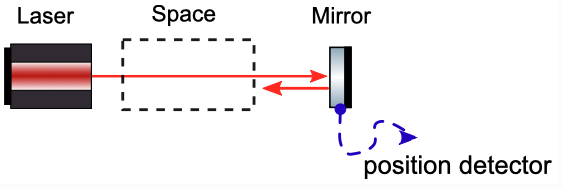

The optical layout is very simple, with a laser beam being reflected by a single mirror. The interesting aspects of this setup are hidden in the details: The laser beam includes an amplitude modulation 'signal' whose frequency we can tune; secondly, the mirror is suspended on a **Pendulum**. A **MotionDetector** is then used to plot the transfer function from laser amplitude fluctuations to the mirror's longitudinal motion.

In [1]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Optical setup: laser, space and mirror:
    l l1 P=1
    s s1 l1.p1 m1.p1
    m m1 R=1 T=0

    # Define a pendulum for our mirror, with a z-motion resonance at 10Hz
    # and Q factor of 1000
    pendulum sus1 m1.mech mass=1 fz=10 Qz=1000

    # Measure the mirror's longitudinal motion
    xd m1_z m1.mech.z

    # Set a signal frequency to activate the signal simulation
    # (needed for radiation pressure effects to be observed)
    fsig(1)

    # Generate amplitude modulation at the laser
    sgen sig l1.amp

    # Sweep the frequency of the amplitude modulation
    xaxis(fsig.f, log, 1, 100, 400)
    """
)

There are also two new commands in this script. **fsig** sets the "signal frequency" of the model; this is the frequency at which effects such as field amplitude or mirror oscillations are modelled. It is set to 1 Hz, as the frequency will be swept by the **xaxis** anyway. Next, the **sgen** command is used to inject a signal at the model's signal frequency into the **Laser**'s *amp* port, which causes a small amplitude modulation to be generated.

## Output Plots

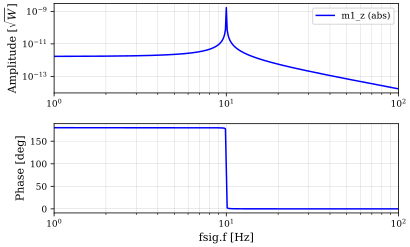

In [2]:
out = kat.run()
out.plot(log=True);

Upon reflection by the mirror, the photons reverse their momentum. This momentum transger gives rise to a force on the mirror, the so-called 'radiation-pressure force'. FINESSE assumes a steady state of the optical system, which in this case means that we assume the static radiation-pressure force to be compensated by another static force, for example via active control or through gravity. The amplitude modulation signal on the laser light, however, creates a modulation of the force which we can model and measure in a steady state. The mechanical transfer function of the mirror determines how the longitudinal force (as a function of frequency) translates into motion. Thus the *xd* detector here essentially probes the shape of this transfer function, a single pole at 10 Hz with a Q factor of 1000.